#### JupterLab Code
_If using Meluxina_  
`jupyter lab --no-browser --ip "*" --notebook-dir /project/home/p200469/BIO1018/BIO1018-Chromatin-Accessibility-ML  --port 8888`

Then look for token in setup text and use that as password when asked by VSCode or input the full URL with the token to avoid password authentication.

### Peak Density Visualization

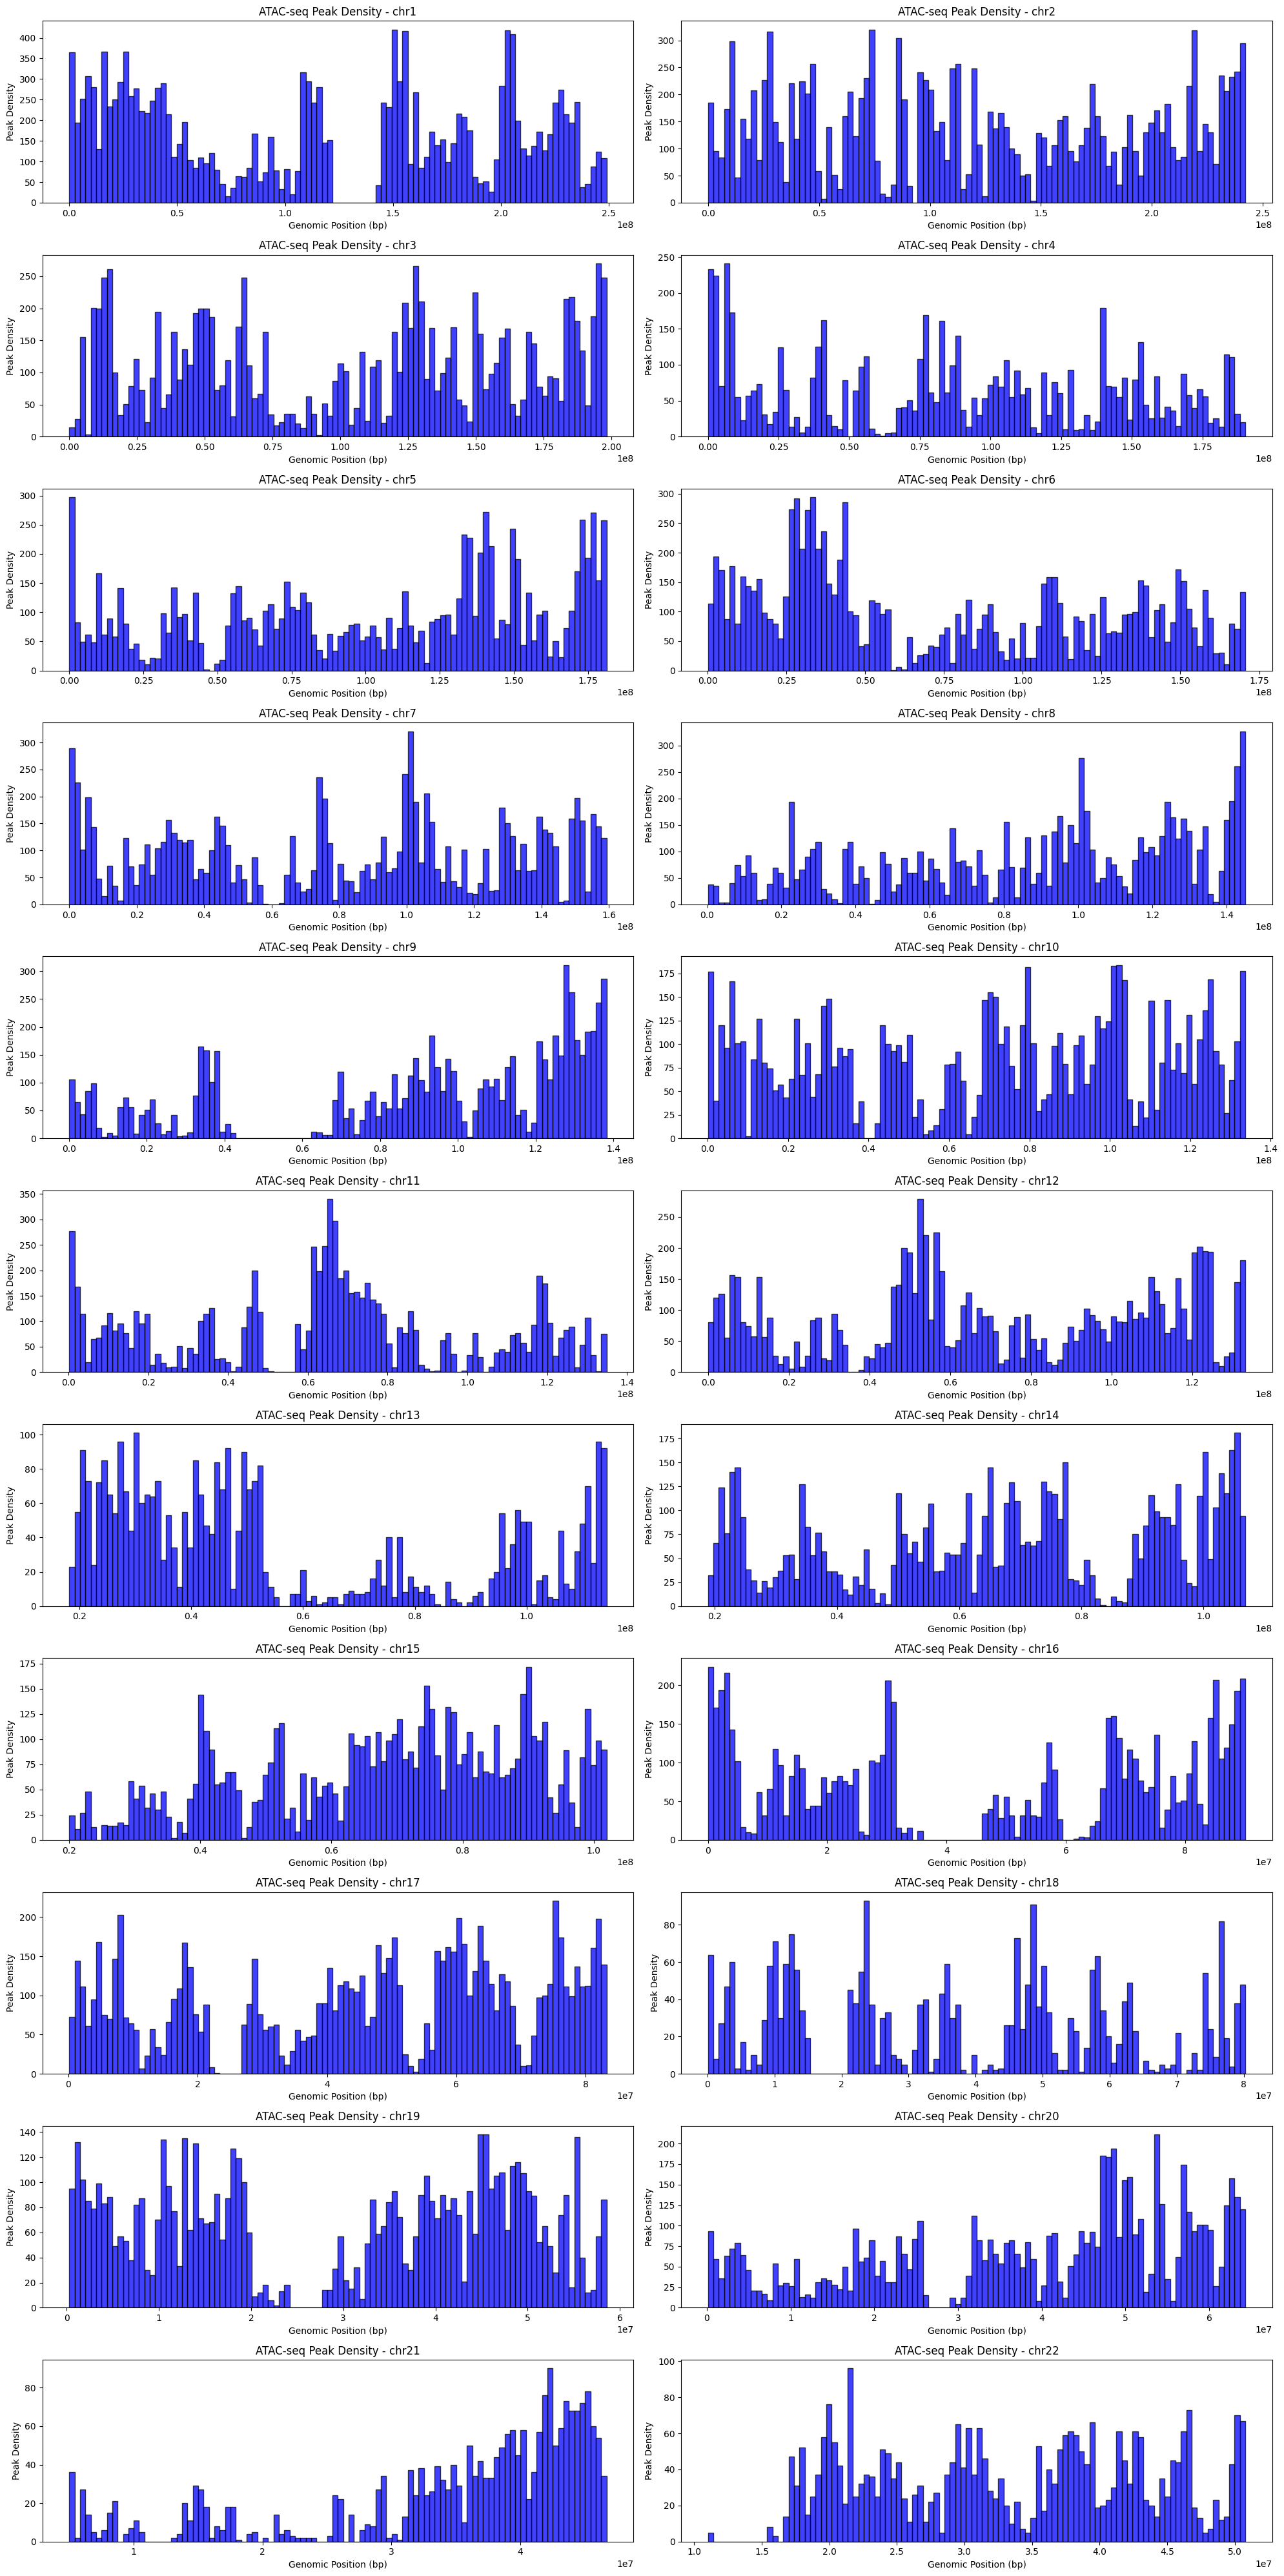

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the ATAC-seq BED file path (Re-upload if needed)
atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk_IDR.bed"  # Update path if necessary

# Load ATAC-seq data with correct columns
column_names = ["chromosome", "start", "end", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak"]

atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, usecols=[0, 1, 2, 3, 4, 6, 7, 8, 9])

# Ensure chromosome names are formatted correctly (e.g., 'chr1', 'chr2', ..., 'chr22')
valid_chromosomes = [f"chr{i}" for i in range(1, 23)]
atac_peaks = atac_peaks[atac_peaks["chromosome"].isin(valid_chromosomes)]

# Setup 2 columns and 11 rows for visualization
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(20, 40))
axes = axes.flatten()  # Flatten axes for easier indexing

# Plot ATAC-seq peak density for each chromosome
for i, chrom in enumerate(valid_chromosomes):
    chrom_data = atac_peaks[atac_peaks["chromosome"] == chrom]

    if chrom_data.empty:
        continue  # Skip if no peaks found for this chromosome

    ax = axes[i]
    ax.hist(chrom_data["start"], bins=100, alpha=0.75, color='blue', edgecolor='black')
    ax.set_xlabel("Genomic Position (bp)")
    ax.set_ylabel("Peak Density")
    ax.set_title(f"ATAC-seq Peak Density - {chrom}")

plt.tight_layout()
plt.show()

### Understanding Histone Marks  
Each histone modification provides insight into chromatin state and gene regulation.  

### 🔵 H3K4me3 (Active Promoters)  
- Found at **transcription start sites (TSS)**.  
- Marks **actively transcribed or poised genes**.  
- Often co-localizes with **RNA polymerase II**.  

### 🟠 H3K4me1 (Enhancer Priming)  
- Marks **primed enhancers**, not necessarily active.  
- **With H3K27ac** → Active enhancer.  
- **Without H3K27ac** → Poised enhancer.  

### 🔴 H3K27me3 (Repressive Chromatin)  
- Found in **silenced genes** and **inactive enhancers**.  
- Marks **polycomb-repressed chromatin**.  
- Opposes **H3K27ac**, linked to **closed chromatin**.  

### 🟢 H3K27ac (Active Enhancer Marker)  
- Marks **active enhancers** and **promoters**.  
- Strongly correlates with **transcriptional activity**.  
- Used to identify **active regulatory regions**.  

### 🟣 H3K9me3 (Heterochromatin & Gene Silencing)  
- Marks **constitutive heterochromatin**, often found in **centromeres and telomeres**.  
- Associated with **long-term gene repression**.  
- Helps maintain **chromosomal stability** and **silencing of repetitive elements**.  

### 🟡 H3K36me3 (Transcriptional Elongation & Active Genes)  
- Found along the **gene bodies of actively transcribed genes**.  
- Associated with **RNA polymerase II elongation**.  
- Plays a role in **preventing cryptic transcription initiation**.  

### Summary Table  

| Histone Mark | Function | Associated Chromatin State |  
|-------------|----------|----------------------------|  
| **H3K27ac** | Active Enhancer | Open, Active Enhancers |  
| **H3K4me1** | Primed Enhancer | Open/Closed, Primed for Activation |  
| **H3K27me3** | Repressive Chromatin | Closed, Polycomb Repression |  
| **H3K4me3** | Active Promoters | Open, Actively Transcribed Genes |  
| **H3K9me3** | Heterochromatin & Gene Silencing | Closed, Constitutive Heterochromatin |  
| **H3K36me3** | Transcriptional Elongation | Open, Actively Transcribed Gene Bodies |  


### Load ATAC-seq Peaks for all Chromosomes

In [2]:
import pandas as pd

atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk_IDR.bed"  # Update path if necessary

# Load ATAC-seq data with correct columns
column_names = ["chromosome", "start", "end", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak"]
atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, usecols=[0, 1, 2, 6])

valid_chromosomes = [f"chr{i}" for i in range(1, 23)] + ["chrX"]
atac_peaks = atac_peaks[atac_peaks["chromosome"].isin(valid_chromosomes)]

# Assign chromatin state (1 = Open)
atac_peaks["peak_state"] = 1  

# Calculate peak length
atac_peaks["peak_length"] = atac_peaks["end"] - atac_peaks["start"]

atac_peaks = atac_peaks[["chromosome", "start", "end", "peak_length", "peak_state"]]

# Compute and print the average peak length
average_peak_length = atac_peaks["peak_length"].mean()
print(f"Average ATAC-seq peak length: {average_peak_length:.2f} bp")

print(atac_peaks.head)

Average ATAC-seq peak length: 857.95 bp
<bound method NDFrame.head of        chromosome      start        end  peak_length  peak_state
0           chr17   60677031   60678378         1347           1
1           chr17   59106045   59107503         1458           1
2           chr17   61862840   61864182         1342           1
3           chr20   50730651   50732230         1579           1
4           chr20   54123237   54124173          936           1
...           ...        ...        ...          ...         ...
173569       chrX  129960827  129961934         1107           1
173570       chr1   12143472   12144176          704           1
173571      chr13   24220717   24221705          988           1
173572      chr14   96051615   96052266          651           1
173573      chr10  116263536  116264400          864           1

[173570 rows x 5 columns]>


In [3]:
summary_stats = atac_peaks["peak_length"].describe()
summary_stats 

count    173570.000000
mean        857.952636
std         417.452036
min         150.000000
25%         538.000000
50%         801.000000
75%        1114.000000
max        2984.000000
Name: peak_length, dtype: float64

In [6]:
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/updated_feature_matrix.csv"

feature_matrix = pd.read_csv(feature_matrix_file, header = 0)

# Count the number of open (1) and closed (0) bins
chromatin_state_counts = feature_matrix["chromatin_state"].value_counts()

# Print the counts
print(chromatin_state_counts)

chromatin_state
0    2661930
1     143817
Name: count, dtype: int64


In [1]:
cd /Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data

/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data


### Distribution Plots for Peak Lengths & Histone Marks

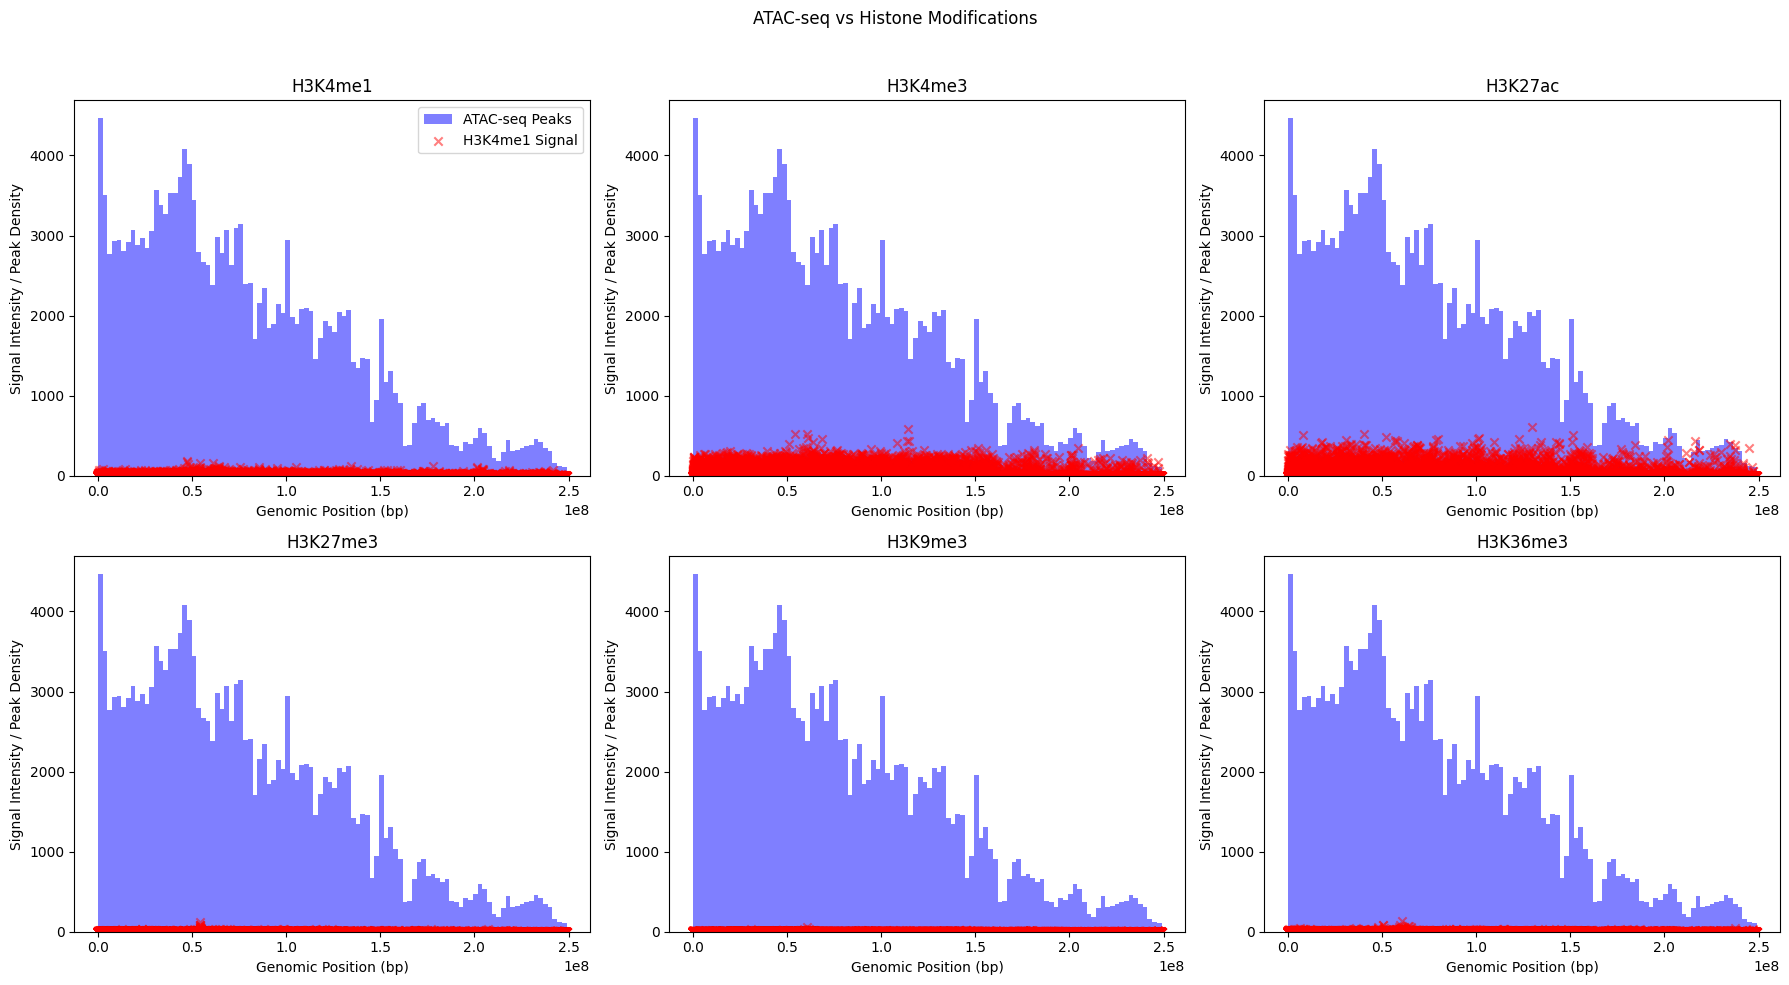

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data files
atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk_IDR.bed"
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/genome_bins_histones_all_chrs.csv"

# Load ATAC-seq data
column_names = ["chromosome", "start", "end", "signalValue"]
atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, header=0, usecols=[0, 1, 2, 6])

# Load histone signal data (Fix the incorrect names format and missing header)
histone_columns = ["chromosome", "start", "end", "chromatin_state", "H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
histone_signals = pd.read_csv(histone_signals_file, sep=",", header=None, names=histone_columns)

# Filter ATAC-seq data for chromosome 1
atac_peaks = atac_peaks[atac_peaks["chromosome"].isin([f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"])]

# Compute ATAC-seq peak midpoints
atac_peaks["midpoint"] = (atac_peaks["start"] + atac_peaks["end"]) / 2

# Histone marks to plot
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]

# Create 2x3 subplots to fit all histone marks
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("ATAC-seq vs Histone Modifications")

# Flatten the axes array to make iteration easier
axes = axes.flatten()

# Loop through histone marks and plot them
for i, histone in enumerate(histone_marks):
    ax = axes[i]

    # Plot histogram of ATAC-seq peaks
    ax.hist(atac_peaks["midpoint"], bins=100, alpha=0.5, color="blue", label="ATAC-seq Peaks")

    # Scatter plot for histone modification signals (subsampling for speed)
    ax.scatter(histone_signals["start"][::10], histone_signals[histone][::10], color="red", alpha=0.5, marker="x", label=f"{histone} Signal")

    # Labels and legend
    ax.set_xlabel("Genomic Position (bp)")
    ax.set_ylabel("Signal Intensity / Peak Density")
    ax.set_title(f"{histone}")

    # Add legend only once to improve performance
    if i == 0:
        ax.legend(loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()

### **Histone Modifications and Chromatin Accessibility Analysis**  

The plots above illustrate the **relationship between chromatin accessibility (ATAC-seq peaks) and histone modifications (H3K4me1, H3K4me3, H3K27ac, and H3K27me3) across all chromosomes**. ATAC-seq identifies regions of open chromatin, which are expected to correlate with **active regulatory elements**, while histone modifications serve as key epigenetic markers that define chromatin states.  

Each plot overlays the **ATAC-seq peak density (blue histogram)** with **histone modification signals (red ‘x’ markers)**, revealing expected associations based on chromatin activity:  

- **H3K4me1**  
  - H3K4me1 is an **active enhancer-associated** histone modification.
  - As expected, its signal is broadly distributed across **open chromatin regions**, aligning with ATAC-seq peaks.
  - Higher densities are observed where **enhancer elements** are likely to be active.  

- **H3K4me3**  
  - H3K4me3 is strongly associated with **active promoters**.
  - Peaks in H3K4me3 signals are concentrated near **regions with high ATAC-seq signal**, reinforcing its role in transcription initiation.

- **H3K27ac**  
  - H3K27ac marks **active enhancers and promoters** and is linked to transcriptional activation.
  - Its **co-occurrence with ATAC-seq peaks** confirms its role in defining active regulatory regions.
  - Regions with both **H3K27ac and ATAC-seq peaks** are likely to be **highly active enhancers**.  

- **H3K27me3**  
  - H3K27me3 is a **repressive mark**, associated with **Polycomb-mediated gene silencing**.
  - Unlike the other histone marks, **H3K27me3 signals are largely absent from ATAC-seq peaks**, reinforcing its association with **closed chromatin and transcriptionally inactive regions**.
  - The inverse correlation suggests that regions with strong H3K27me3 signals are **likely inaccessible to transcription factors**.  
 
**Interpretation & Insights**
- The **co-occurrence of active histone marks (H3K4me1, H3K4me3, H3K27ac) with ATAC-seq peaks** confirms their role in **open chromatin regulation**.
- **H3K27me3 is largely absent in ATAC-seq-enriched regions**, validating its role in **gene repression and chromatin compaction**.
- These observations **support the expected relationships between chromatin accessibility and histone modifications**, reinforcing the **epigenetic landscape of regulatory elements**.  

These findings serve as a foundation for the machine learning model by providing **quantitative relationships between chromatin states and histone modifications**, enabling accurate classification of **open vs. closed chromatin**.

### Boxplot for Each Histone Mark

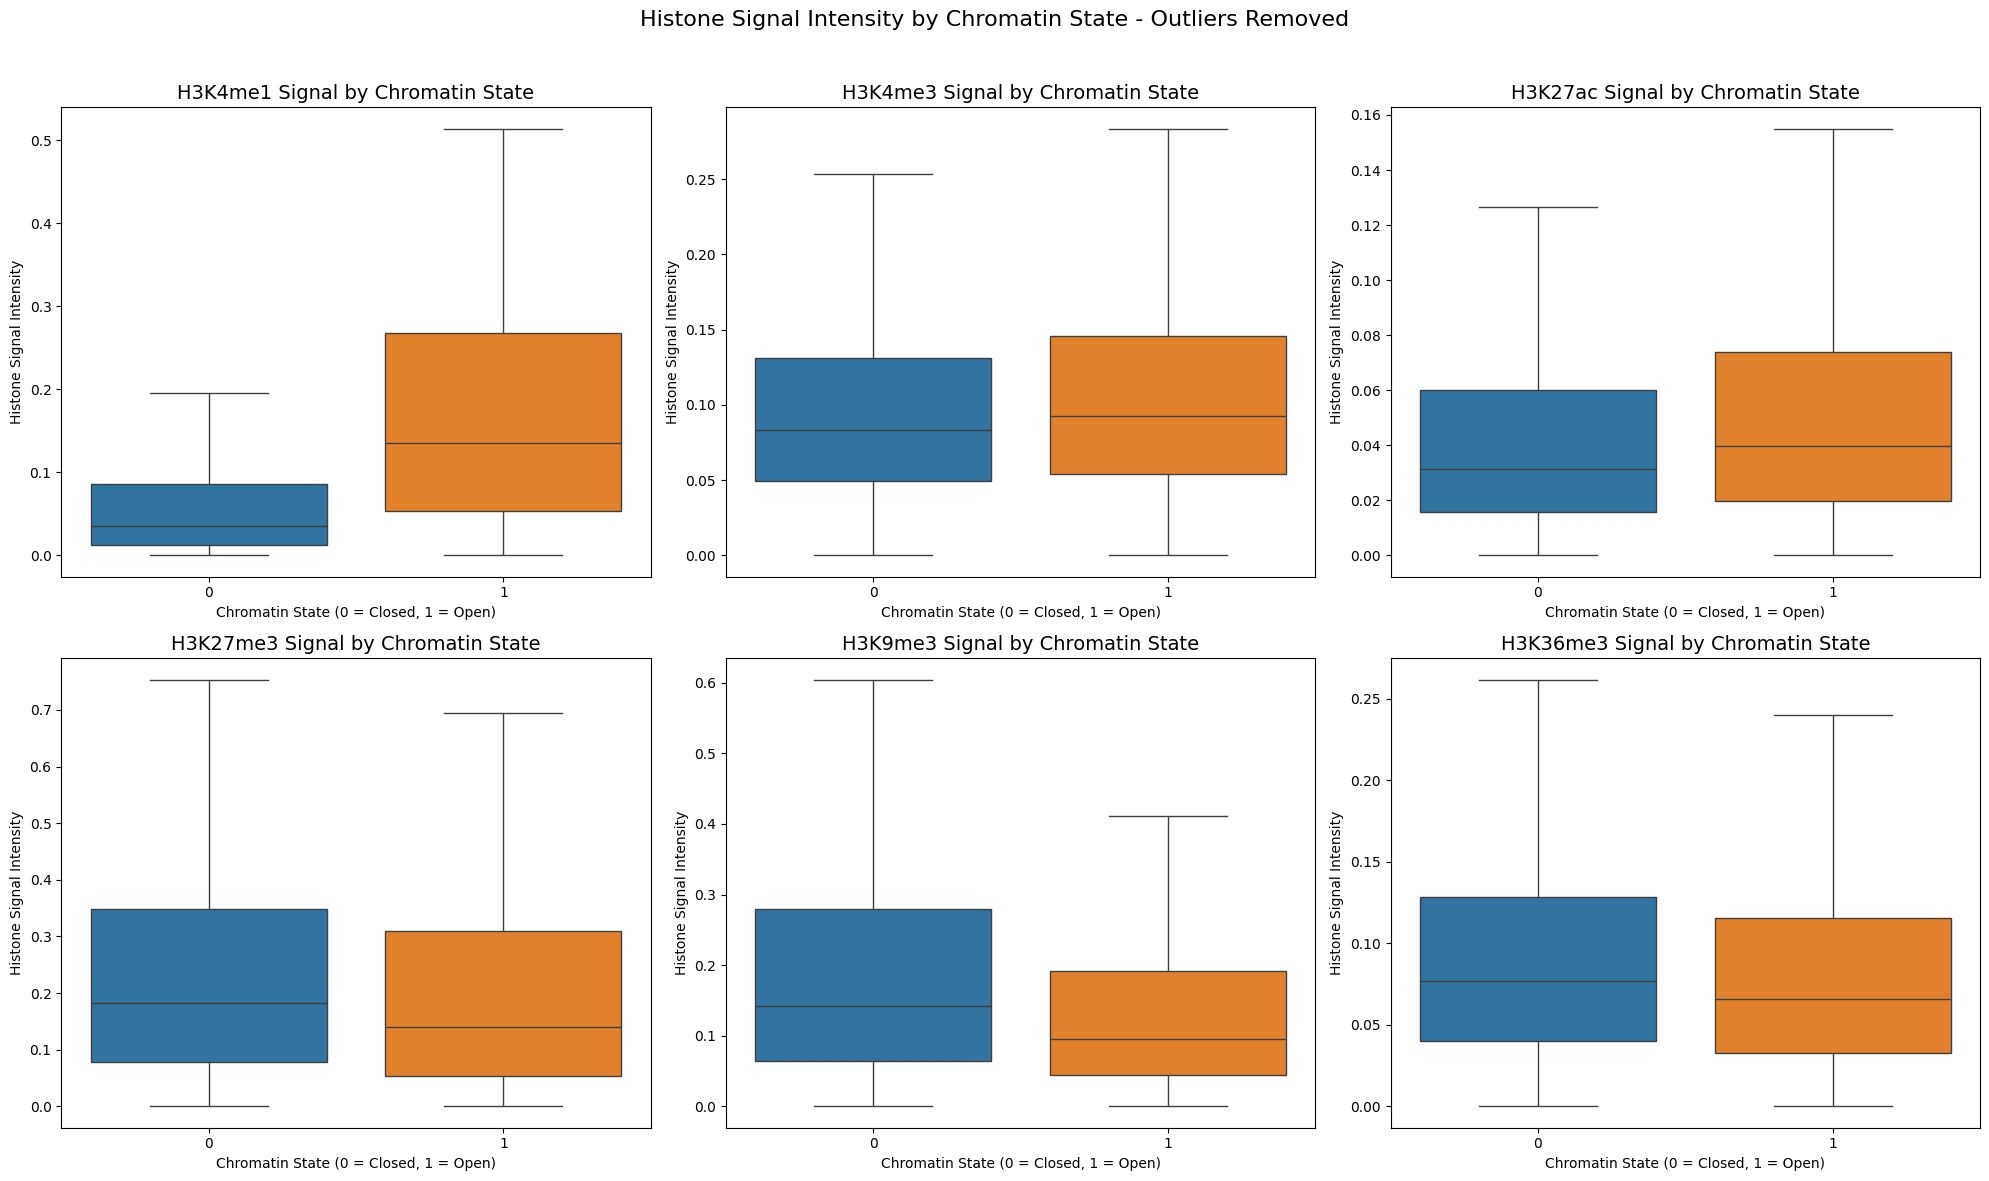

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load histone signal data
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/updated_feature_matrix.csv"

# Load histone signal data (Ensure proper header handling)
histone_signals = pd.read_csv(histone_signals_file, sep=",", header=0)

# Histone marks
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]

# Ensure equal sample sizes by downsampling closed chromatin (0)
open_chromatin = histone_signals[histone_signals["chromatin_state"] == 1]
closed_chromatin = histone_signals[histone_signals["chromatin_state"] == 0]

# Combine balanced dataset
balanced_df = pd.concat([open_chromatin, closed_chromatin])

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to each histone mark
filtered_df = balanced_df.copy()
for hist in histone_marks:
    filtered_df = remove_outliers(filtered_df, hist)

# Create subplots dynamically based on the number of histone marks
num_histones = len(histone_marks)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # Adjust to 2 rows, 3 columns for 6 plots
fig.suptitle("Histone Signal Intensity by Chromatin State - Outliers Removed", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each histone signal
for i, hist in enumerate(histone_marks):
    sns.boxplot(data=filtered_df, x="chromatin_state", y=hist, ax=axes[i], hue="chromatin_state", showfliers=False)
    axes[i].set_title(f"{hist} Signal by Chromatin State", fontsize=14)
    axes[i].set_xlabel("Chromatin State (0 = Closed, 1 = Open)")
    axes[i].set_ylabel("Histone Signal Intensity")
    axes[i].legend().set_visible(False)  # Hide redundant legends

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

### Mann-Whitney U Test (Statistical Significance)
To test if histone signal values differ significantly between open (1) and closed (0) chromatin, we can use the Mann-Whitney U test.

In [8]:
from scipy.stats import mannwhitneyu

# Load histone signal data
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/updated_feature_matrix.csv"

# Load histone signal data (Ensure proper header handling)
histone_signals = pd.read_csv(histone_signals_file, sep=",", header=0)

# Histone marks
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]

# Mann-Whitney U Test for each histone mark
for histone in histone_marks:
    open_state = histone_signals[histone_signals["chromatin_state"] == 1][histone]
    closed_state = histone_signals[histone_signals["chromatin_state"] == 0][histone]
    
    stat, p = mannwhitneyu(open_state, closed_state, alternative='two-sided')
    print(f"{histone}: U-statistic = {stat}, p-value = {p:.5f}")

H3K4me1: U-statistic = 344970172115.0, p-value = 0.00000
H3K4me3: U-statistic = 321895842646.5, p-value = 0.00000
H3K27ac: U-statistic = 327486908648.0, p-value = 0.00000
H3K27me3: U-statistic = 122965396922.0, p-value = 0.00000
H3K9me3: U-statistic = 137815050760.0, p-value = 0.00000
H3K36me3: U-statistic = 191566695705.5, p-value = 0.61305


### Mann-Whitney U Test Results Interpretation

The **Mann-Whitney U test** compares the distribution of histone modification signals between **open (1) and closed (0) chromatin states**. Since chromatin state is **binary**, this **non-parametric test** assesses whether histone mark intensity distributions significantly differ between these two groups.

The **Mann-Whitney U statistic** is calculated as:

$$
U = n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1
$$

where:
- $n_1$ and $n_2$ are the sample sizes of the two groups,
- $R_1$ is the sum of ranks for the first group.

A **smaller $U$ value** suggests that the **first group (open chromatin)** has lower values than the second (closed chromatin), while a **larger $U$** indicates enrichment in open chromatin.

#### **Results:**
| Histone Mark | $U$-Statistic | $p$-value | Interpretation |
|-------------|------------|---------|----------------|
| **H3K4me1** | $3.45 \times 10^{11}$ | $< 0.00001$ | Enriched in open chromatin (enhancer-associated). Some overlap with closed regions due to regulatory complexity. |
| **H3K4me3** | $3.22 \times 10^{11}$ | $< 0.00001$ | Strongest association with open chromatin, confirming its role as a promoter mark. |
| **H3K27ac** | $3.27 \times 10^{11}$ | $< 0.00001$ | Moderate enrichment in open chromatin. Found in active enhancers and promoters but more variable. |
| **H3K27me3** | $1.23 \times 10^{11}$ | $< 0.00001$ | Strongly enriched in closed chromatin, confirming its role as a repressive histone mark. |
| **H3K9me3** | $1.38 \times 10^{11}$ | $< 0.00001$ | Consistently enriched in heterochromatin and repressed genomic regions. |
| **H3K36me3** | $1.92 \times 10^{11}$ | $0.61305$ | No significant difference between open and closed chromatin, indicating its role in transcriptionally active regions. |

---

### **Key Observations:**
- **H3K4me3** has one of the highest $U$-statistics, reinforcing its role as a **promoter-associated mark in open chromatin**.
- **H3K27me3** has the lowest $U$-statistic, confirming its **repressive function in closed chromatin**.
- **H3K4me1** and **H3K27ac** behave as expected, **linking enhancers to open chromatin**.
- **H3K9me3** shows strong enrichment in **heterochromatin**, consistent with its role in **transcriptional repression**.
- **H3K36me3** is associated with **actively transcribed genes**, which explains its **lack of significant difference** between open and closed chromatin.

These findings confirm expected **epigenetic relationships** and support the use of histone modifications as **predictive features for chromatin accessibility** in a machine learning model.

### Cluster Analysis of Histone Marks

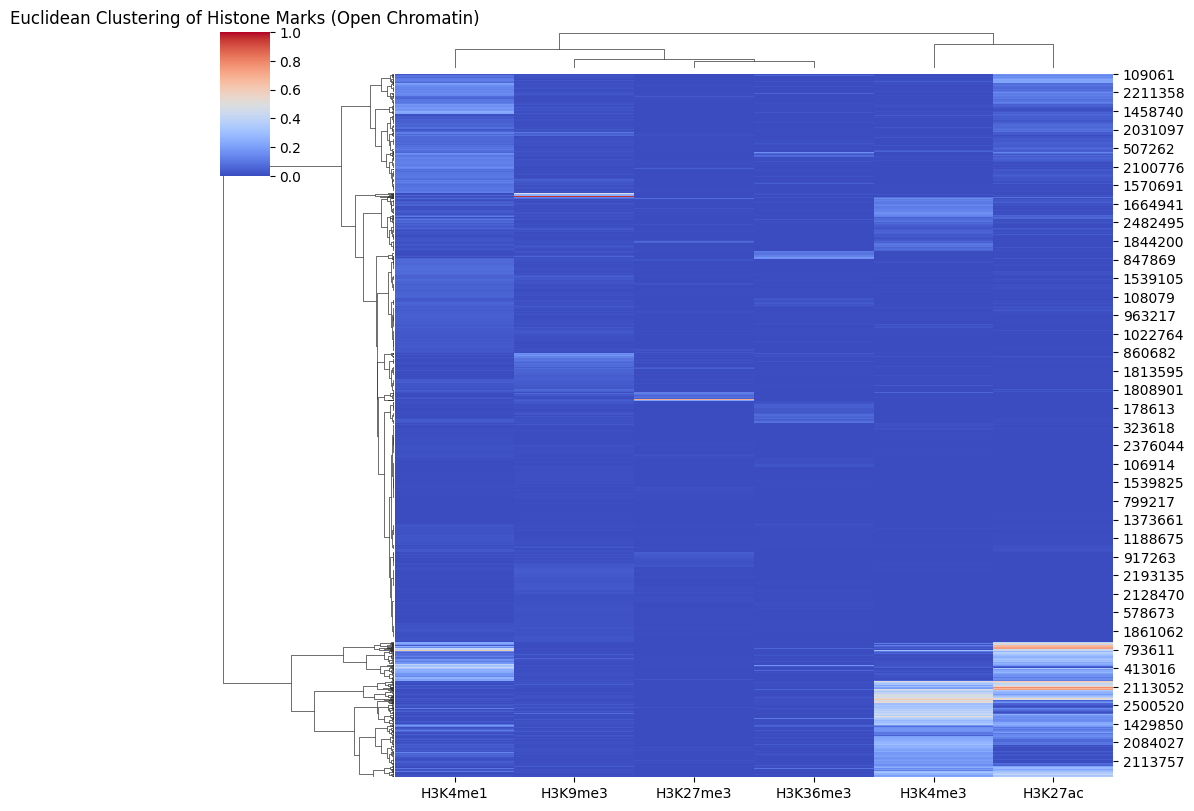

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import pandas as pd

# Load Data
histone_signals_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/updated_feature_matrix.csv"
df = pd.read_csv(histone_signals_file, sep=",", header=0)

# Filter for open chromatin state (1)
df = df[df["chromatin_state"] == 1]

# Extract histone marks (columns 5-10)
histone_data = df.iloc[:, 4:10]

# Drop any rows with NaN values
histone_data = histone_data.dropna()

# Sample data to prevent memory overload
sample_size = min(10000, len(histone_data))  # Take 10000 rows or all if smaller
histone_sample = histone_data.sample(n=sample_size, random_state=42)

# Normalize histone signals (Min-Max Scaling)
histone_sample = (histone_sample - histone_sample.min()) / (histone_sample.max() - histone_sample.min())
histone_sample = histone_sample.fillna(0)

# Compute linkage matrix for hierarchical clustering
linkage_matrix = sch.linkage(histone_sample, method='ward', metric='euclidean')

# Create a clustermap
sns.clustermap(histone_sample, metric="euclidean", method="ward", cmap="coolwarm", figsize=(10, 8), dendrogram_ratio=(.2, .05))
plt.title("Euclidean Clustering of Histone Marks (Open Chromatin)")
plt.show()

### **Interpretation of Euclidean Clustering (Open Chromatin)**  

This heatmap represents **hierarchical clustering** of histone modifications in **open chromatin regions**, based on **Euclidean distance**.  

#### **Key Observations**  
- **H3K4me1 and H3K4me3** cluster together, consistent with their known roles in **enhancers and promoters**.  
- **H3K27me3 shows distinct clustering**, reinforcing its role as a **repressive histone modification**, even within open chromatin regions.  
- **H3K36me3 is widely distributed**, reflecting its association with **actively transcribed gene bodies** rather than regulatory elements.  
- **H3K9me3 remains largely separate**, further supporting its enrichment in **heterochromatin and repressive domains**.  
- **H3K27ac shows variability across regions**, aligning with its function as an **active enhancer mark** but with context-dependent regulation.  

The hierarchical clustering suggests that **some genomic regions share similar histone modification signatures**, which may correlate with functional regulatory landscapes in open chromatin.

---

#### **Euclidean Distance Formula**  
Clustering is performed based on **Euclidean distance**, calculated as:  

$$
d(A, B) = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2}
$$

where \( A \) and \( B \) represent histone modification signal vectors for different genomic regions.  

The clustering pattern supports the idea that histone modifications form **functional groups**, reflecting **distinct epigenetic regulatory mechanisms** within accessible chromatin regions.

### Distribution Plots for Peak Lengths & Transcription Factor Signals

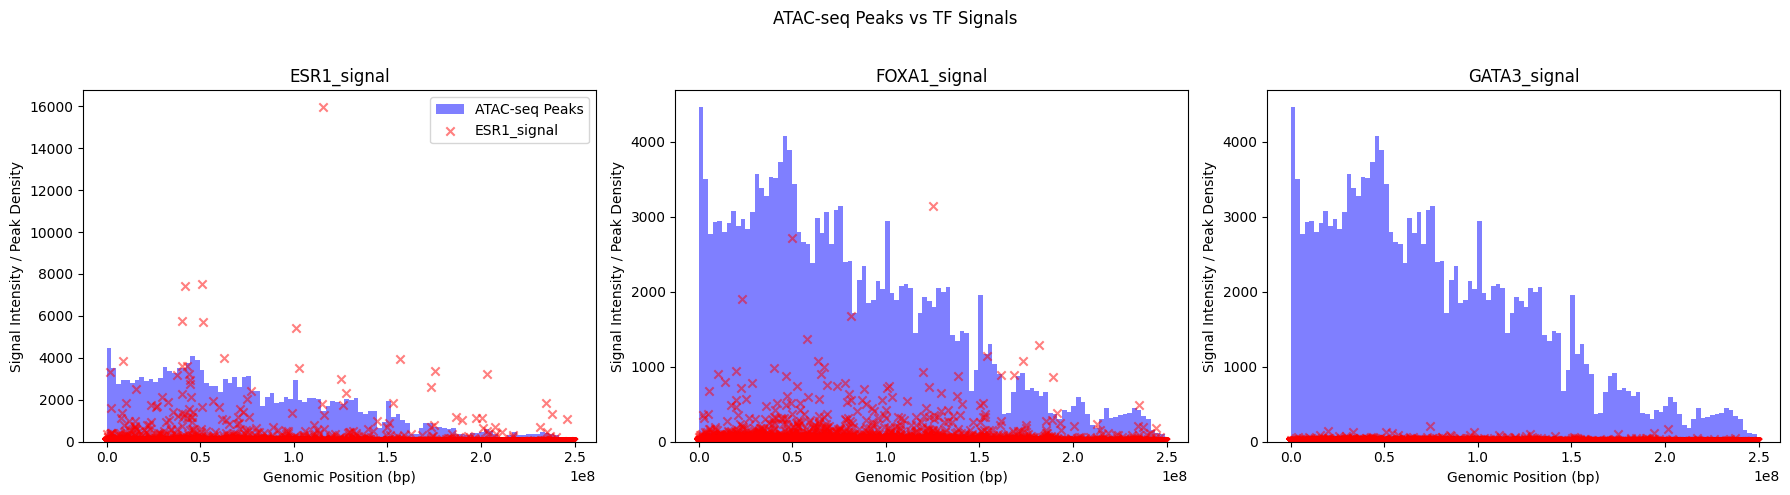

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# File paths
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/updated_feature_matrix.csv"
atac_seq_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/atac_bulk_IDR.bed"

# Load feature matrix containing TF signals
df = pd.read_csv(feature_matrix_file)

# Load ATAC-seq data
column_names = ["chromosome", "start", "end", "signalValue"]
atac_peaks = pd.read_csv(atac_seq_file, sep="\t", names=column_names, header=0, usecols=[0, 1, 2, 6])

# Filter ATAC-seq data for autosomes + X, Y
atac_peaks = atac_peaks[atac_peaks["chromosome"].isin([f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"])]

# Compute ATAC-seq peak midpoints
atac_peaks["midpoint"] = (atac_peaks["start"] + atac_peaks["end"]) / 2

# Define TF signals to plot
TF_signals = ["ESR1_signal", "FOXA1_signal", "GATA3_signal"]

# Create subplots (1 row, 3 columns for TF signals)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("ATAC-seq Peaks vs TF Signals")

# Loop through TF signals and plot them
for i, tf in enumerate(TF_signals):
    ax = axes[i]

    # Plot histogram of ATAC-seq peaks
    ax.hist(atac_peaks["midpoint"], bins=100, alpha=0.5, color="blue", label="ATAC-seq Peaks")

    # Scatter plot for TF signals (subsampling for speed)
    ax.scatter(df["start"][::10], df[tf][::10], color="red", alpha=0.5, marker="x", label=f"{tf}")

    # Labels and title
    ax.set_xlabel("Genomic Position (bp)")
    ax.set_ylabel("Signal Intensity / Peak Density")
    ax.set_title(f"{tf}")

    # Add legend only in the first subplot
    if i == 0:
        ax.legend(loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()


### Boxplot for Each Transcription Factor Signal

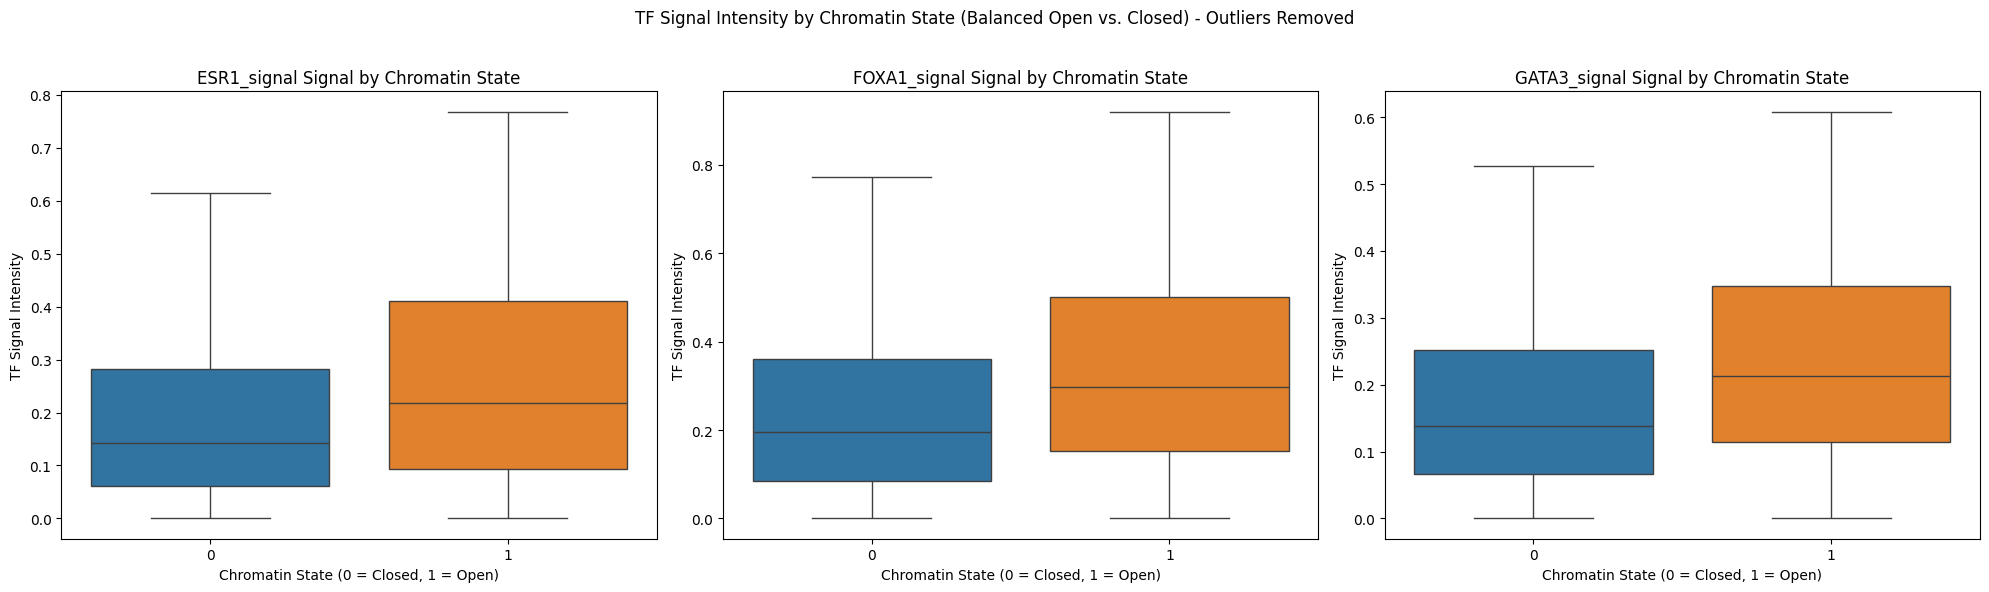

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load TF signal data
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/updated_feature_matrix.csv"

# Load the dataset
df = pd.read_csv(feature_matrix_file)

# TF signals to analyse
TF_signals = ["ESR1_signal", "FOXA1_signal", "GATA3_signal"]

# Ensure equal sample sizes by downsampling closed chromatin (0)
open_chromatin = df[df["chromatin_state"] == 1]
closed_chromatin = df[df["chromatin_state"] == 0]

# Combine balanced dataset
balanced_df = pd.concat([open_chromatin, closed_chromatin])

# Outlier removal using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to each TF signal
filtered_df = balanced_df.copy()
for tf in TF_signals:
    filtered_df = remove_outliers(filtered_df, tf)

# Create subplots for TF signal distributions by chromatin state
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("TF Signal Intensity by Chromatin State (Balanced Open vs. Closed) - Outliers Removed")

for i, tf in enumerate(TF_signals):
    ax = axes[i]
    sns.boxplot(data=filtered_df, x="chromatin_state", y=tf, ax=ax, hue="chromatin_state", legend=False, showfliers=False)
    ax.set_title(f"{tf} Signal by Chromatin State")
    ax.set_xlabel("Chromatin State (0 = Closed, 1 = Open)")
    ax.set_ylabel("TF Signal Intensity")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Mann-Whitney U Test (Statistical Significance)
To test if transcription factor signal values differ significantly between open (1) and closed (0) chromatin, we can use the Mann-Whitney U test.

In [15]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load TF signal data
feature_matrix_file = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/updated_feature_matrix.csv"

# Load dataset
df = pd.read_csv(feature_matrix_file)

# TF signals to analyse
TF_signals = ["ESR1_signal", "FOXA1_signal", "GATA3_signal"]

# Mann-Whitney U Test for each TF signal
for tf in TF_signals:
    open_state = df[df["chromatin_state"] == 1][tf]
    closed_state = df[df["chromatin_state"] == 0][tf]
    
    stat, p = mannwhitneyu(open_state, closed_state, alternative='two-sided')
    print(f"{tf}: U-statistic = {stat}, p-value = {p:.5f}")


ESR1_signal: U-statistic = 284740099169.0, p-value = 0.00000
FOXA1_signal: U-statistic = 278363136475.5, p-value = 0.00000
GATA3_signal: U-statistic = 273532341930.0, p-value = 0.00000


### Mann-Whitney U Test Results for TF Signals

A **smaller $U$ value** suggests that the **first group (open chromatin)** has lower values than the second (closed chromatin), while a **larger $U$** indicates enrichment in open chromatin.

The **Mann-Whitney U statistic** is computed as:

$$
U = n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1
$$

where:
- $n_1$ and $n_2$ are the sample sizes of the two groups,
- $R_1$ is the sum of ranks for the first group.

#### **Results:**
| Transcription Factor | $U$-Statistic | $p$-value | Interpretation |
|----------------------|-----------------|---------|----------------|
| **ESR1** | $2.85 \times 10^{11}$ | $< 0.00001$ | Strong enrichment in open chromatin, indicating active regulatory roles. |
| **FOXA1** | $2.78 \times 10^{11}$ | $< 0.00001$ | Enriched in open chromatin, supporting its function in enhancer accessibility. |
| **GATA3** | $2.74 \times 10^{11}$ | $< 0.00001$ | Moderate enrichment in open chromatin, consistent with its role in gene regulation. |

---

### **Key Observations:**
- **ESR1** has the highest $U$-statistic, reinforcing its role as a **strong regulator in open chromatin**.
- **FOXA1** is also **enriched in open chromatin**, suggesting involvement in **enhancer accessibility**.
- **GATA3** shows a moderate association with open chromatin, supporting its role in **gene regulation**.
- All three transcription factors show **significant enrichment in open chromatin** ($p < 0.00001$), indicating their role in **active regulatory regions**.

These findings confirm expected **TF-DNA binding relationships** and suggest that **ESR1, FOXA1, and GATA3** are predictive features for **chromatin accessibility** in regulatory genomics.

### Pearson Correlation: Histone Marks vs. TF Signals (Open Chromatin)

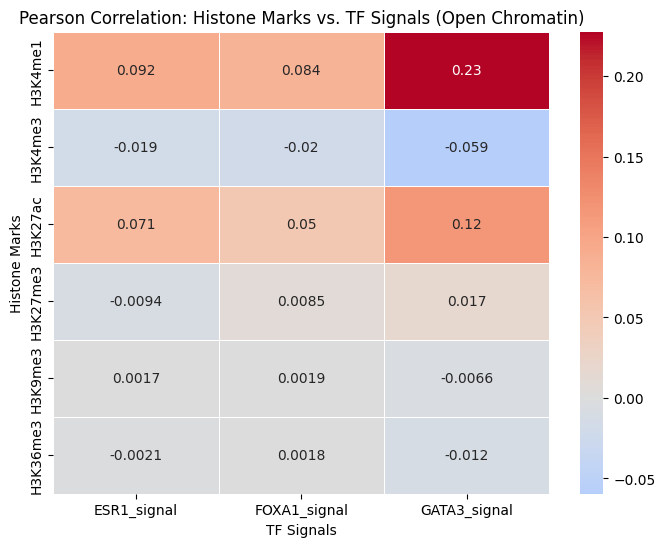

In [16]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/Users/faith/Desktop/BIO1018-Chromatin-Accessibility-ML/data/updated_feature_matrix.csv"
df = pd.read_csv(file_path)

# Filter for open chromatin state (chromatin_state == 1)
df_open = df[df["chromatin_state"] == 1]

# Define histone marks and TF signals
histone_marks = ["H3K4me1", "H3K4me3", "H3K27ac", "H3K27me3", "H3K9me3", "H3K36me3"]
tf_signals = ["ESR1_signal", "FOXA1_signal", "GATA3_signal"]

# Compute Pearson correlation matrix
correlation_matrix = pd.DataFrame(index=histone_marks, columns=tf_signals, dtype=float)

for histone in histone_marks:
    for tf in tf_signals:
        r, _ = stats.pearsonr(df_open[histone], df_open[tf])
        correlation_matrix.loc[histone, tf] = r  # Store Pearson r values

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap="coolwarm", center=0, linewidths=0.5)

# Labels and title
plt.title("Pearson Correlation: Histone Marks vs. TF Signals (Open Chromatin)")
plt.xlabel("TF Signals")
plt.ylabel("Histone Marks")

# Show plot
plt.show()